In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math


def bit_to_freq(bits, N):
    possible = [i for i in range(N)]
    for b in bits:
        if b[0]:
            possible = possible[:len(possible)//2]
        else:
            possible = possible[len(possible)//2:]
    return possible[0]


Bad key "lines.dashed_pattern" on line 18 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dashdot_pattern" on line 19 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dotted_pattern" on line 20 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
o

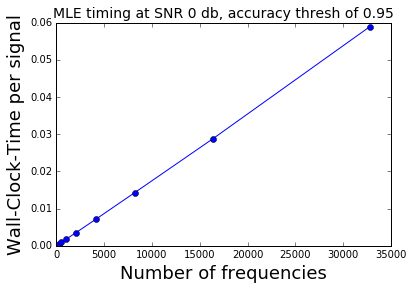

In [11]:
# averaged over 10 trials with 2500 test set per trial foreach N up to 2**15

snr = 0
accuracy = 0.95
Ns = [256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
times_mle = [np.load(('../data/mle_timing/times_snr{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
avgs_mle = [np.mean(a) for a in times_mle]
plt.plot(Ns, avgs_mle, '-bo')
plt.xlabel('Number of frequencies', fontsize=18)
plt.ylabel('Wall-Clock-Time per signal', fontsize=18)
plt.title('MLE timing at SNR {} db, accuracy thresh of {}'.format(snr, accuracy), fontsize=14)
plt.show()

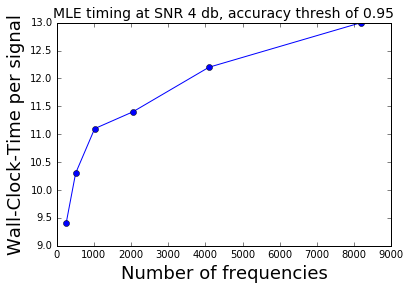

In [9]:
# averaged over 10 trials with 2500 test set per trial foreach N up to 2**15

snr = 4
accuracy = 0.95
Ns = [256, 512, 1024, 2048, 4096, 8192] # , 16384 , 32768]
times_mle = [np.load(('../data/mle_timing/ms{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
avgs_mle = [np.mean(a) for a in times_mle]
plt.plot(Ns, avgs_mle, '-bo')
plt.xlabel('Number of frequencies', fontsize=18)
plt.ylabel('Wall-Clock-Time per signal', fontsize=18)
plt.title('MLE timing at SNR {} db, accuracy thresh of {}'.format(snr, accuracy), fontsize=14)
plt.show()

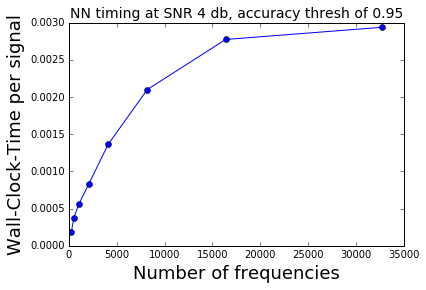

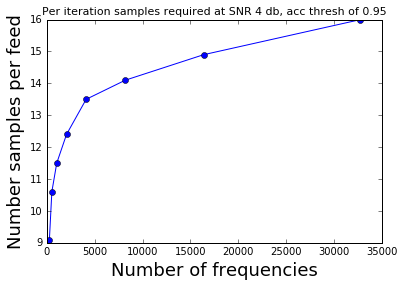

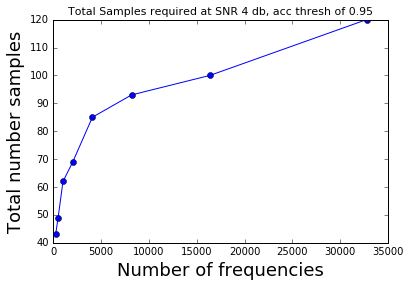

In [25]:
# averaged over 10 trials with 2500 test set per trial foreach N up to 2**15

snr = 4
accuracy = 0.95
Ns = [256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
times_nn = [np.load(('../data/nn_timing/times2_snr{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
ms_nn = [np.load(('../data/nn_timing/ms_snr{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
avgs_nn = [np.median(a) for a in times_nn]
avgs_nn_ms = [np.mean(a) for a in ms_nn]
avgs_nn_totalms = [int(np.ceil(a)) + len(set([(j * (2**i) % int(N)) for j in range(int(np.ceil(a))) for i in range(int(np.log2(N)))])) for a, N in zip(avgs_nn_ms, Ns)]
plt.plot(Ns, avgs_nn, '-bo')
plt.xlabel('Number of frequencies', fontsize=18)
plt.ylabel('Wall-Clock-Time per signal', fontsize=18)
plt.title('NN timing at SNR {} db, accuracy thresh of {}'.format(snr, accuracy), fontsize=14)
plt.show()
plt.plot(Ns, avgs_nn_ms, '-bo')
plt.xlabel('Number of frequencies', fontsize=18)
plt.ylabel('Number samples per feed', fontsize=18)
plt.title('Per iteration samples required at SNR {} db, acc thresh of {}'.format(snr, accuracy), fontsize=11)
plt.show()
plt.plot(Ns, avgs_nn_totalms, '-bo')
plt.xlabel('Number of frequencies', fontsize=18)
plt.ylabel('Total number samples', fontsize=18)
plt.title('Total Samples required at SNR {} db, acc thresh of {}'.format(snr, accuracy), fontsize=11)
plt.show()
#print(avgs_nn_ms)
#print(avgs_nn_totalms)
#print(Ns)

In [3]:
# GET FULL MLE DATA

# averaged over 10 trials with 2500 test set per trial foreach N up to 2**14

snr = 4
accuracy = 0.95
Ns = [256, 512, 1024, 2048, 4096, 8192, 16384, 32768] 
times_nn = [np.load(('../data/nn_timing/times2_snr{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
avgs_nn = [np.mean(a) for a in times_nn]
times_mle = [np.load(('../data/mle_timing/times_snr{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
avgs_mle = [np.mean(a) for a in times_mle]
plt.plot(Ns, avgs_mle[:5], '-ro', label='MLE')
plt.plot(Ns, avgs_nn, '-bo', label='NN')
plt.xlabel('Number of frequencies', fontsize=18)
plt.ylabel('Wall-Clock-Time per signal', fontsize=18)
plt.title('Timing at SNR {} db, accuracy threshold of {}'.format(snr, accuracy), fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/mle_timing/times_snr4_accuracy0.95_N8192.npy'

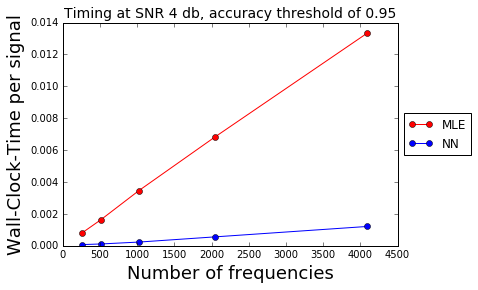

In [20]:
# averaged over 10 trials with 2500 test set per trial foreach N up to 2**12

snr = 4
accuracy = 0.95
Ns = [256, 512, 1024, 2048, 4096]
times_nn = [np.load(('../data/nn_timing/times_snr{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
avgs_nn = [np.mean(a) for a in times_nn]
times_mle = [np.load(('../data/mle_timing/times_snr{}_accuracy{}_N{}.npy').format(snr, accuracy, i)) for i in Ns]
avgs_mle = [np.mean(a) for a in times_mle]
plt.plot(Ns, avgs_mle[:5], '-ro', label='MLE')
plt.plot(Ns, avgs_nn, '-bo', label='NN')
plt.xlabel('Number of frequencies', fontsize=18)
plt.ylabel('Wall-Clock-Time per signal', fontsize=18)
plt.title('Timing at SNR {} db, accuracy threshold of {}'.format(snr, accuracy), fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()